<div align="center" style="display: inline-block; background: white; padding: 8px;">
  <img src="https://cdn.prod.website-files.com/633b44aa19e0eb425d7e8c7f/63724d646ecb4bd4cbdf7440_LOGO%20NUCLIO%20DIGITAL%20SCHOOL-01-01.png" alt="Nuclio Digital School" width="220">
</div>

# MODELOS SUPERVISADOS

## REGRESORES Y CLASIFICADORES

La regresión tiene como objetivo producir un modelo que capture la relación entre una variable de interés  Y (target) y una o más variables predictoras de entrada X_1 … X_N. 

**Tipos comunes de regresión**
- [Regresión lineal](#regresion-lienal): para variables numéricas
- [Polinómica](#regresion-polinomica): cuando una relación lineal no es la mejor opción
- [Logística](#regresion-logistica): para target binarios (clasificación)



### Regresión lineal <a id="regresion-lienal"></a>

No se debe asociar el concepto _lineal_ con línea ya que se refiere a la relación que hay entre las variables.\
Típicamente el modelo no se comportará como una recta. Su expresión general es la de un hiperplano de $\mathbb{R}^n$ (n dimensiones): 

$$
a_0 + a_1 x_1 + a_2 x_2 + \cdots + a_n x_n = y
$$

En particular, para el caso de dos dimensiones, se tiene una recta:

$$
a_1 x_1 + a_0 = y
$$

También es habitual encontrar esta última expresión como:
$$
a x + b = y
$$

donde a es la pendiente de la recta (como de inclinada está) y b es la intersección con el eje y (la "altura" de la recta)


Extra: En la siguiente animación se puede ver el proceso iterativo de ajuste con los datos que se realiza en un entrenamiento de regresión lineal:
https://raw.githubusercontent.com/arvention/linear-regression/master/animation.gif

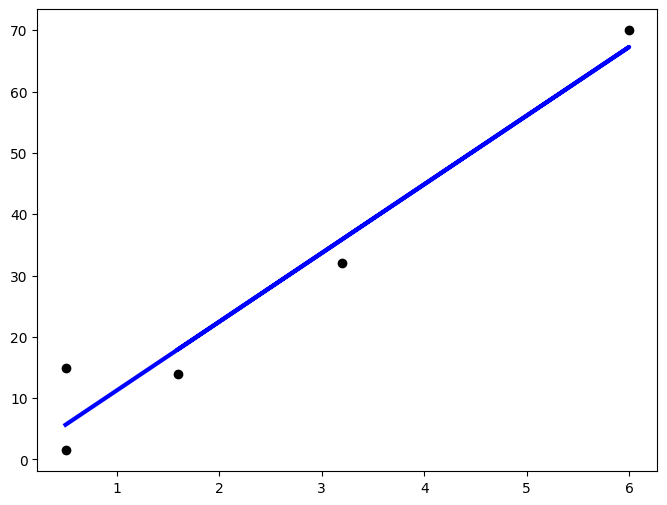

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

D_lin_reg = np.array([[1.6,14],[3.2,32],[6,70],[0.5,1.5],[0.5,15]])
x_lin_reg = D_lin_reg[:,0].reshape(-1, 1) #formato columna
y_lin_reg = D_lin_reg[:,1].reshape(-1, 1)

# Crear objeto LinearRegression
lin_reg = linear_model.LinearRegression()

# Entrenamiento del modelo usando training sets
lin_reg.fit(x_lin_reg, y_lin_reg)
y_pred_lin_reg = lin_reg.predict(x_lin_reg)

# Plot
fig = plt.figure(figsize=(8,6))
plt.scatter(x_lin_reg, y_lin_reg,  color='black')
plt.plot(x_lin_reg, y_pred_lin_reg, color='blue', linewidth=3)
plt.show()

Coeficientes e índices de ajuste:

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Coeficientes de la recta
print('Pendiente a = {}'.format(lin_reg.coef_))
print('Intersección b = {}'.format(lin_reg.intercept_))

# Performance indexes
print('Error cuadrático media MSE = {}'.format(mean_squared_error(y_lin_reg, y_pred_lin_reg)))
print('Coeficiente de determinación R2 = {}'.format(r2_score(y_lin_reg, y_pred_lin_reg)))

Pendiente a = [[11.20408354]]
Intersección b = [0.05836286]
Error cuadrático media MSE = 28.619704456460966
Coeficiente de determinación R2 = 0.9495421289554637


$$
MSE = \frac{\text{Suma de errores al cuadrado del modelo}}{\text{Número de observaciones}}
$$
<br>

$$
R^2 = 1 - \frac{\text{Suma de errores del modelo}}{\text{Suma de errores respecto a la media}}
$$


<div style="background-color:#fff3cd; padding:10px; border-left:4px solid #ffc107; margin:10px 0; color:#2c3e50;">
<strong>⚠️ Nota:</strong> Se extiene un ejemplo con más detalle en el notebook linear_regression_example.ipynb
</div>

### Regresión Polinómica <a id="regresion-polinomica"></a>

En la **regresión polinómica** no se cambia el principio de la regresión lineal (minimizar el error entre los valores observados y los predichos), sino que lo que se hace es **ampliar el conjunto de variables de entrada** para incluir potencias y combinaciones de ellas.  

La expresión general en varias variables es:

$$
a_0 + a_1 x_1 + a_2 x_1^2 + a_3 x_2 + a_4 x_2^2 + a_5 x_1 x_2 + \cdots = y
$$

Por ejemplo, en el caso de una sola variable, la forma polinómica de grado 2 sería:

$$
a_0 + a_1 x + a_2 x^2 = y
$$

Y en su forma más común:

$$
ax^2 + bx + c = y
$$

donde:
- \( a \) controla la **curvatura** de la parábola,
- \( b \) influye en la **pendiente**,
- \( c \) es la intersección con el eje \( y \).  

En resumen:  
- En la regresión **lineal múltiple** obtenemos un **hiperplano** en $\mathbb{R}^n$.  
- En la regresión **polinómica** lo que hacemos es aumentar el espacio de características para permitir que el modelo represente **curvas** o **superficies más complejas**.  

Coeficientes (incluyendo término independiente): [[ 0.         -1.78559404  3.87175325 -0.30964406]]
Intercepto: [8.21356421]
MSE: 18.23
R2: 0.97


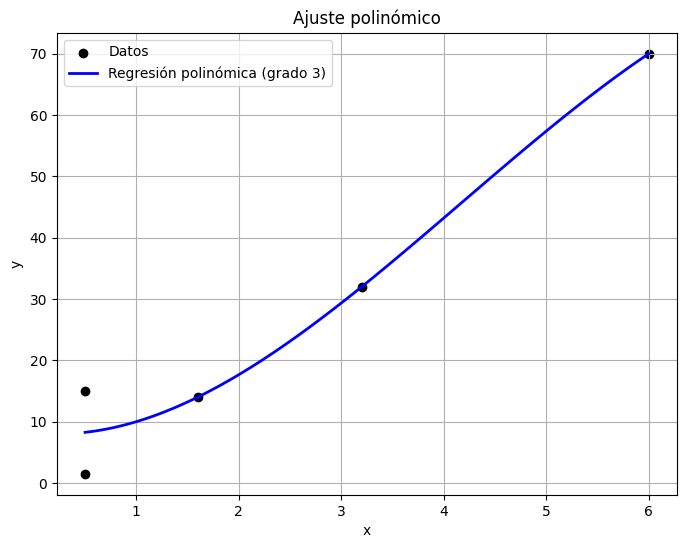

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Datos
D_pol_reg = np.array([[1.6,14],[3.2,32],[6,70],[0.5,1.5],[0.5,15]])
x_pol_reg = D_pol_reg[:,0].reshape(-1, 1)  # Característica
y_pol_reg = D_pol_reg[:,1].reshape(-1, 1)  # Variable objetivo

# Grado del polinomio
n = 3

# Transformación polinómica
poly = PolynomialFeatures(degree=n)
x_poly = poly.fit_transform(x_pol_reg)

# Ajuste del modelo lineal sobre las características polinómicas
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y_pol_reg)

# Predicción para visualización
x_pred_pol_reg = np.linspace(x_pol_reg.min(), x_pol_reg.max(), 100).reshape(-1, 1)
x_pred_poly = poly.transform(x_pred_pol_reg)
y_pred_pol_reg = pol_reg.predict(x_pred_poly)

# Predicción sobre los datos originales para métricas
y_fit_pol_reg = pol_reg.predict(x_poly)

# Coeficientes y métricas
print(f"Coeficientes (incluyendo término independiente): {pol_reg.coef_}")
print(f"Intercepto: {pol_reg.intercept_}")
print(f"MSE: {mean_squared_error(y_pol_reg, y_fit_pol_reg):.2f}")
print(f"R2: {r2_score(y_pol_reg, y_fit_pol_reg):.2f}")

# Gráfico
plt.figure(figsize=(8, 6))
plt.scatter(x_pol_reg, y_pol_reg, color='black', label='Datos')
plt.plot(x_pred_pol_reg, y_pred_pol_reg, color='blue', linewidth=2, label=f'Regresión polinómica (grado {n})')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste polinómico")
plt.legend()
plt.grid(True)
plt.show()

### Regresión Logística <a id="regresion-logistica"></a>

Aunque su nombre contiene la palabra regresión, la regresión logística es en realidad un modelo de **clasificación** binario (separa en dos clases).

Los modelos de regresión logística en scikit-learn no pueden manejar variables categóricas directamente, requieren que todas las variables 
sean numéricas. Normalmente, esto se hace mediante una codificación one-hot para variables categóricas.

**One-Hot Encoding** es una técnica utilizada para convertir variables categóricas a formato numérico. Las variables categóricas no pueden 
ser directamente utilizadas por la mayoría de los algoritmos de ML, que necesitan datos numéricos. One-Hot Encoding crea una columna binaria (que solo puede contener los valores 0 o 1) para cada valor único que exista en la variable categórica que estamos codificando, y marcar con un 1 la columna correspondiente al valor presente en cada registro, dejando las demás columnas con un valor de 0.


In [132]:
import pandas as pd

df = pd.DataFrame({
    'Color': ['Rojo', 'Azul', 'Verde', 'Azul', 'Rojo']
})

df_encoded = pd.get_dummies(df, columns=['Color'])
print(df_encoded)

   Color_Azul  Color_Rojo  Color_Verde
0       False        True        False
1        True       False        False
2       False       False         True
3        True       False        False
4       False        True        False


Veamos el primer ejemplo de regresión logística:

Accuracy: 0.8


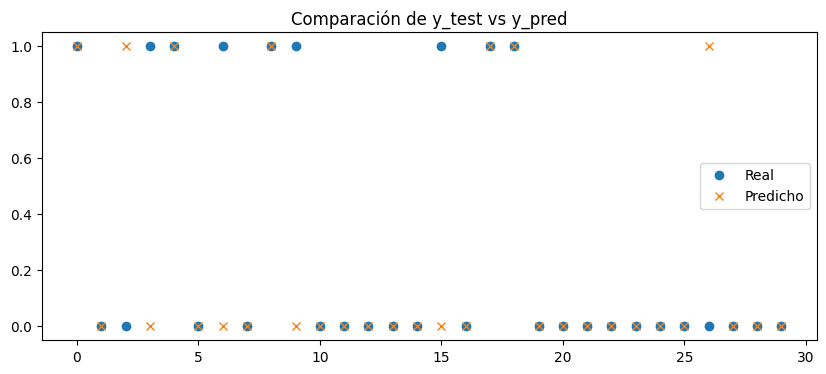

In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris # Usamos un dataset de los que ofrece la librería sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_iris_log_reg = iris.data  
y_iris_log_reg = (iris.target == 1).astype(int) # Elegimos una de las 3 clases disponibles (0, 1, 2) 

# random_state fija la semilla para el split alestorio
X_train_iris_log_reg, X_test_iris_log_reg, y_train_iris_log_reg, y_test_iris_log_reg = train_test_split(X_iris_log_reg, y_iris_log_reg, test_size=0.2, random_state=42) 
log_reg_iris = LogisticRegression()
log_reg_iris.fit(X_train_iris_log_reg, y_train_iris_log_reg)

y_pred_iris_log_reg = log_reg_iris.predict(X_test_iris_log_reg)

print("Accuracy:", accuracy_score(y_test_iris_log_reg, y_pred_iris_log_reg))

plt.figure(figsize=(10,4))
plt.plot(y_test_iris_log_reg, 'o', label="Real")
plt.plot(y_pred_iris_log_reg, 'x', label="Predicho")
plt.legend()
plt.title("Comparación de y_test vs y_pred")
plt.show()


In [133]:
df_diabetes = pd.read_csv("diabetes_prediction_dataset.csv")
df_diabetes.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [4]:
df_diabetes = pd.read_csv("diabetes_prediction_dataset.csv")
df_diabetes = pd.get_dummies(df_diabetes, columns=['smoking_history', 'gender'], drop_first=True)
display(df_diabetes.head())

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,gender_Male,gender_Other
0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False,False,False
1,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False,False,False
2,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False,True,False
3,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False,False,False
4,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False,True,False


In [16]:
X_diabetes_log_reg = df_diabetes.drop(columns=['diabetes'])
y_diabetes_log_reg = df_diabetes['diabetes']

# Dividir los datos en conjuntos de entrenamiento y test
X_train_diabetes_log_reg, X_test_diabetes_log_reg, y_train_diabetes_log_reg, y_test_diabetes_log_reg = train_test_split(X_diabetes_log_reg, y_diabetes_log_reg, test_size=0.2, random_state=42)

log_reg_diabetes = LogisticRegression(max_iter=500)
log_reg_diabetes.fit(X_train_diabetes_log_reg, y_train_diabetes_log_reg)

LogisticRegression(max_iter=500)

In [138]:
# Seleccionar un paciente del conjunto de test
sample_index_diabetes = 0  # Puedes cambiar este índice para ver otros pacientes
sample_diabetes = X_test_diabetes_log_reg.iloc[sample_index_diabetes]
sample_actual_diabetes = y_test_diabetes_log_reg.iloc[sample_index_diabetes]

# print("Muestra seleccionada del conjunto de prueba:")
# print(sample)
print(f"Valor real de la muestra (¿diabetes?): {sample_actual_diabetes}")

# Realizar la predicción
sample_pred = log_reg_diabetes.predict([sample_diabetes])[0]
sample_array = np.array(sample_diabetes).reshape(1, -1)  # Forma (1, n_features)
sample_pred_proba = log_reg_diabetes.predict_proba(sample_array)[0][1]

print(f"Predicción del modelo: {sample_pred}")
print(f"Probabilidad predicha de tener diabetes: {sample_pred_proba:.2f}")

Valor real de la muestra (¿diabetes?): 0
Predicción del modelo: 0
Probabilidad predicha de tener diabetes: 0.00


c:\Users\cde\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\cde\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [140]:
first_diabetes_patient_index = y_test_diabetes_log_reg[y_test_diabetes_log_reg==1].index[0]
sample_diabetes_positive = X_test_diabetes_log_reg.loc[first_diabetes_patient_index, :]
sample_actual_diabetes_positive = y_test_diabetes_log_reg.loc[first_diabetes_patient_index]

print("Muestra seleccionada del conjunto de prueba:")
print(sample_diabetes_positive)
print(f"Valor real de la muestra (¿diabetes?): {sample_actual_diabetes_positive}")

Muestra seleccionada del conjunto de prueba:
age                             33.0
hypertension                       0
heart_disease                      0
bmi                            40.08
HbA1c_level                      6.2
blood_glucose_level              200
smoking_history_current        False
smoking_history_ever           False
smoking_history_former         False
smoking_history_never          False
smoking_history_not current     True
gender_Male                    False
gender_Other                   False
Name: 92991, dtype: object
Valor real de la muestra (¿diabetes?): 1


In [141]:
# Realizar la predicción
sample_pred_2 = log_reg_diabetes.predict([sample_diabetes_positive])[0]
sample_2_array = np.array(sample_diabetes_positive).reshape(1, -1)  # Forma (1, n_features)
sample_pred_proba_2 = log_reg_diabetes.predict_proba(sample_2_array)[0][1]

print(f"Predicción del modelo: {sample_pred_2}")
print(f"Probabilidad predicha de tener diabetes: {sample_pred_proba_2:.2f}")

Predicción del modelo: 0
Probabilidad predicha de tener diabetes: 0.26


c:\Users\cde\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\cde\AppData\Local\miniconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


### KNN (k-Nearest Neighbors)

Es un método de aprendizaje supervisado utilizado tanto en clasificación como en regresión.  

La idea fundamental es muy intuitiva: para predecir la clase o el valor de un nuevo dato, el modelo busca cuáles son los ejemplos de entrenamiento más cercanos (según una medida de distancia) y toma una decisión basándose en ellos.  

Este enfoque tiene como principal ventaja que es simple y fácil de interpretar.  
Por contra, también tiene algunas limitaciones:  
- Su rendimiento depende fuertemente de la elección de k y de la métrica de distancia.  
- Puede ser costoso computacionalmente cuando el conjunto de datos es muy grande.  

A continuación se detalla el paso a paso del algoritmo:<br><br>
[1] Seleccionar el número de vecinos $k$.

[2] Escoger tipo de distancia para realizar los cálculos (Manhattan, euclídea, ..) 

[3] Tomar los $k$ vecinos más cercanos según la distancia utilizada.

[3.1] Clasificación: Contar la cantidad de vecinos que pertenecen a cada clase y asignar la de mayor valor

[3.2] Regresión: Calcular la media aritmética de las targets y asignar ese valor

In [142]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Cargar el dataset
iris = load_iris()
X_knn_clf = iris.data
y_knn_clf = iris.target

# Descripción de las columnas del dataset
# iris.target_names
# iris.feature_names

# Dividir los datos en entrenamiento y prueba
X_train_knn_clf, X_test_knn_clf, y_train_knn_clf, y_test_knn_clf = train_test_split(X_knn_clf, y_knn_clf, test_size=0.2)
# X_train_knn_clf, X_test_knn_clf, y_train_knn_clf, y_test_knn_clf = train_test_split(X_knn_clf, y_knn_clf, test_size=0.2, random_state=42)

# Instanciar y entrenar el modelo KNN
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train_knn_clf, y_train_knn_clf)

# Realizar una predicción
predicciones = knn_clf.predict(X_test_knn_clf)

print("Predicciones de clasificación:", predicciones)
print("Reales de clasificación:", y_test_knn_clf)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test_knn_clf, predicciones)
print(f"Accuracy: {accuracy:.2f}")

Predicciones de clasificación: [2 2 2 0 1 2 1 0 1 1 0 0 1 1 2 1 2 0 1 0 2 1 2 0 2 0 1 2 0 2]
Reales de clasificación: [2 2 2 0 1 2 1 0 1 1 0 0 1 1 2 1 2 0 1 0 2 1 2 0 2 0 2 2 0 2]
Accuracy: 0.97


In [26]:
# Construir el DataFrame uniendo los datos y los nombres de las columnas
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

# Opcional: agregar la columna target (valor objetivo del precio medio de vivienda)
df_iris['target'] = iris.target

In [27]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [143]:
from sklearn.datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# Cargar el dataset
cali = fetch_california_housing()
X_knn_reg = cali.data
y_knn_reg = cali.target

# Dividir los datos en entrenamiento y prueba
X_train_knn_reg, X_test_knn_reg, y_train_knn_reg, y_test_knn_reg = train_test_split(X_knn_reg, y_knn_reg, test_size=0.2, random_state=42)

# Instanciar y entrenar el modelo KNNRegressor
knn_reg = KNeighborsRegressor(n_neighbors=5)
knn_reg.fit(X_train_knn_reg, y_train_knn_reg)

# Realizar una predicción
predicciones = knn_reg.predict(X_test_knn_reg)

print("Predicciones de precios:", predicciones)

Predicciones de precios: [1.623  1.0822 2.8924 ... 2.5944 1.649  2.005 ]


### KNNImputer, se parece pero no es lo mismo

In [98]:
import pandas as pd
from sklearn.impute import KNNImputer

df_imputation = pd.read_excel('test_imputation.xlsx',header=0)
df_imputation.head(10)

,a,b,c
0,1,1,3.0
1,1,0,4.0
2,4,4,10.0
3,4,3,11.0
4,6,7,21.0
5,5,7,20.0
6,1,1,NaN
7,3,4,NaN
8,6,8,NaN


In [99]:
# imputer = KNNImputer(n_neighbors=2, weights="uniform")
imputer = KNNImputer(n_neighbors=2, weights="distance")

imputed_data = imputer.fit_transform(df_imputation)

df_imputed = pd.DataFrame(imputed_data,columns=df.columns)
df_imputed.loc[df_imputation['c'].isna()==True]

,a,b,c
6,1.0,1.0,3.000000
7,3.0,4.0,10.414214
8,6.0,8.0,20.585786


### Decission trees

* Los árboles de decisión clasifican los ejemplos ordenándolos hacia abajo en el árbol. Para predecir el target de un registro, partimos de la raíz del árbol, y nos movemos progresivamente hacia abajo siguiendo las ramas correspondientes a sus variables.

* Cada nodo del árbol actúa como un punto de test para una variable determinada, y cada division desde ese nodo corresponde a una possible respuesta para ese nodo.

* La importancia de cada variable está clara y la interpretabilidad del modelo es sencilla.


In [145]:
from sklearn.tree import DecisionTreeClassifier

# Cargar el dataset
iris = load_iris()
X_dtree_clf = iris.data
y_dtree_clf = iris.target

# Descripción de las columnas del dataset
# iris.target_names
# iris.feature_names

# Dividir los datos en entrenamiento y prueba
X_train_dtree_clf, X_test_dtree_clf, y_train_dtree_clf, y_test_dtree_clf = train_test_split(X_dtree_clf, y_dtree_clf, test_size=0.2, random_state=42)

# Crear una instancia del modelo de árbol de decisión
dtree_clf = DecisionTreeClassifier(random_state=42)

# Entrenar el modelo
dtree_clf.fit(X_train_dtree_clf, y_train_dtree_clf)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [153]:
# Importancia de las características
feature_importances_dtree_clf = pd.DataFrame(dtree_clf.feature_importances_, index=iris.feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Importancia de las características:")
print(feature_importances_dtree_clf)

Importancia de las características:
                   Importance
petal length (cm)    0.906143
petal width (cm)     0.077186
sepal width (cm)     0.016670
sepal length (cm)    0.000000


C:\Users\cde\AppData\Local\Temp\ipykernel_19168\1911451813.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_dtree['Importance'], y=feature_importances_dtree.index, palette='viridis')


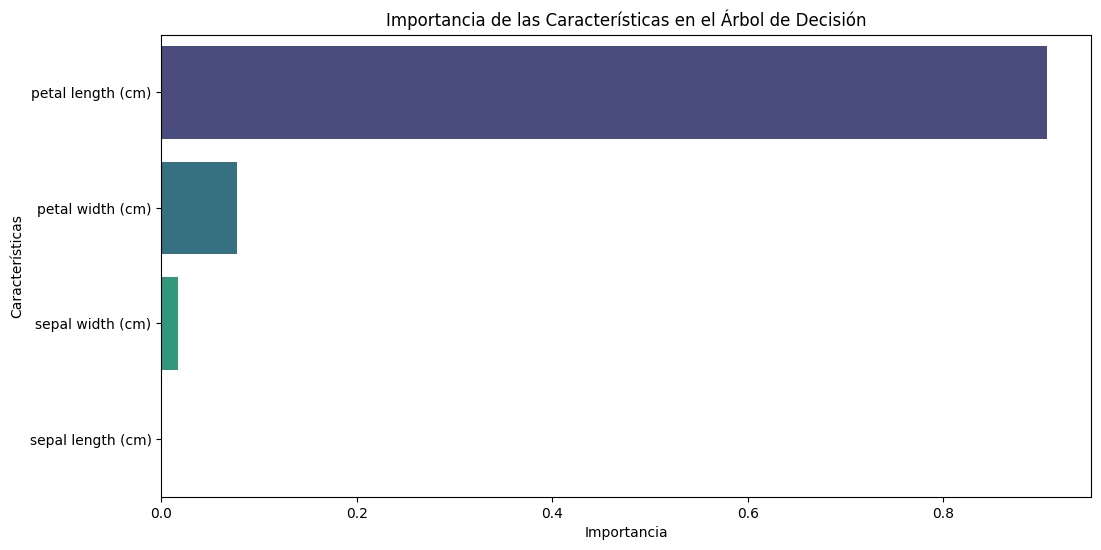

In [151]:
import seaborn as sns

# Plot de la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_dtree_clf['Importance'], y=feature_importances_dtree_clf.index, palette='viridis')
plt.title('Importancia de las Características en el Árbol de Decisión')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [152]:
# Hacer predicciones con el conjunto de prueba
y_pred_dtree_clf = dtree_clf.predict(X_test_dtree_clf)
y_pred_proba_dtree_clf = dtree_clf.predict_proba(X_test_dtree_clf)[:, 1]

accuracy = accuracy_score(y_test_dtree_clf, y_pred_dtree_clf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [154]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# Cargar el dataset de California Housing
california = fetch_california_housing()
X_dtree_reg, y_dtree_reg = california.data, california.target  # X: variables, y: variable objetivo

# Dividir en entrenamiento y prueba
X_train_dtree_reg, X_test_dtree_reg, y_train_dtree_reg, y_test_dtree_reg = train_test_split(X_dtree_reg, y_dtree_reg, test_size=0.2, random_state=0)

# Entrenar el árbol de regresión
dtree_reg = DecisionTreeRegressor(random_state=0)
dtree_reg.fit(X_train_dtree_reg, y_train_dtree_reg)

# Predicción para los primeros 5 registros de test
predicciones = dtree_reg.predict(X_test_dtree_reg[:5])
print(f"Predicciones para los primeros 5 ejemplos de test: {predicciones}")

# Predicción para un ejemplo concreto
ejemplo = X_test_dtree_reg[0].reshape(1, -1)
prediccion_ejemplo = dtree_reg.predict(ejemplo)[0]
print(f"Predicción de valor de vivienda para el primer ejemplo de test: {prediccion_ejemplo:.2f}")

Predicciones para los primeros 5 ejemplos de test: [1.238   2.518   1.627   0.588   5.00001]
Predicción de valor de vivienda para el primer ejemplo de test: 1.24


### Random Forest

Random Forest construye múltiples árboles de decisión. Cada árbol se entrena con una muestra aleatoria de los datos originales

Predicción conjunta:

* En problemas de clasificación, cada árbol vota por una clase, y la clase final es la que obtiene la mayoría de los votos (“voto mayoritario”).

* En problemas de regresión, el resultado corresponde al promedio de las predicciones de todos los árboles.

In [155]:
from sklearn.ensemble import RandomForestClassifier

# Cargar el dataset
iris = load_iris()
X_rf_clf = iris.data
y_rf_clf = iris.target


# Dividir los datos en entrenamiento y prueba
X_train_rf_clf, X_test_rf_clf, y_train_rf_clf, y_test_rf_clf = train_test_split(X_rf_clf, y_rf_clf, test_size=0.2, random_state=42)

# Crear una instancia del modelo de Random Forest
rf_clf = RandomForestClassifier(random_state=42, n_estimators=10) #n_estimators, max_features

# Entrenar el modelo
rf_clf.fit(X_train_rf_clf, y_train_rf_clf)

,n_estimators,10
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [156]:
# Importancia de las características
feature_importances_rf_clf = pd.DataFrame(rf_clf.feature_importances_, index=iris.feature_names, columns=['Importance']).sort_values(by='Importance', ascending=False)
print("Importancia de las características:")
print(feature_importances_rf_clf)

Importancia de las características:
                   Importance
petal length (cm)    0.426007
petal width (cm)     0.399152
sepal length (cm)    0.149085
sepal width (cm)     0.025756


C:\Users\cde\AppData\Local\Temp\ipykernel_19168\2569947592.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_rf_clf['Importance'], y=feature_importances_rf_clf.index, palette='viridis')


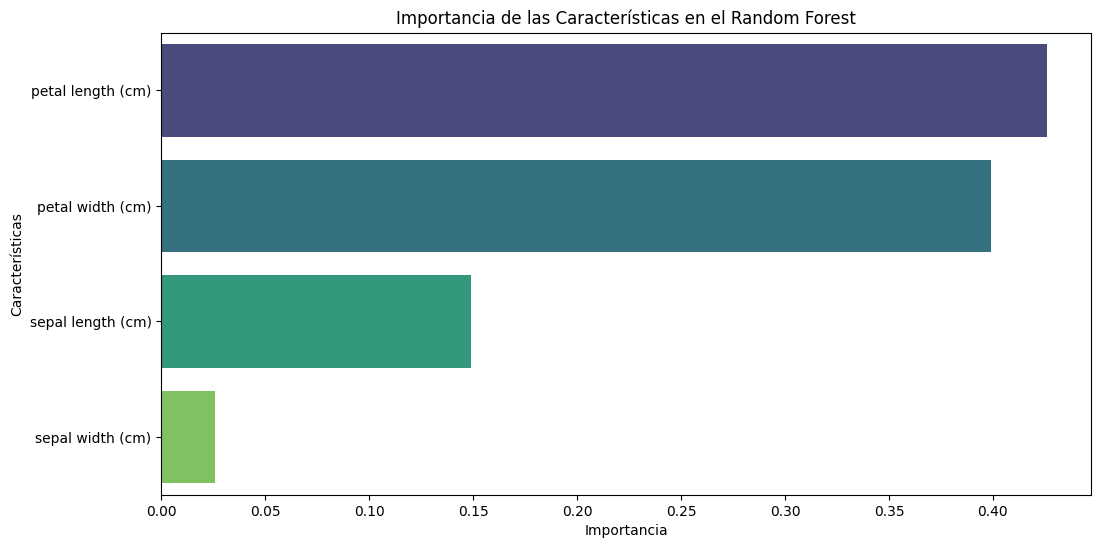

In [157]:
# Plot de la importancia de las características
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importances_rf_clf['Importance'], y=feature_importances_rf_clf.index, palette='viridis')
plt.title('Importancia de las Características en el Random Forest')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

In [158]:
# Hacer predicciones con el conjunto de prueba
y_pred_rf_clf = rf_clf.predict(X_test_rf_clf)
y_pred_proba_rf_clf = rf_clf.predict_proba(X_test_rf_clf)[:, 1]

accuracy = accuracy_score(y_test_rf_clf, y_pred_rf_clf)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


# MODELOS NO SUPERVISADOS

## AGRUPAMIENTO (CLUSTERING)

### K-Means

Algoritmo de aprendizaje no supervisado utilizado para agrupamiento de datos. KMeans busca dividir un conjunto de datos en k grupos (clústeres) de tal forma que los objetos dentro de cada grupo sean lo más similares posible entre sí, y lo más diferentes posible de los objetos de otros grupos.

A continuación se detalla el paso a paso del algoritmo:<br><br>
[1] Especificar el número de clusters $k$ que se van a encontrar en los datos.

[2] Establecer los valores iniciales para los centroides de los clusters $\mu^0_1,\dots,\mu^0_k$ (de forma aleatoria o usando conocimiento previo). 

[3] Asignar cada observación al cluster más cercano (distancia euclidiana).

[4] Recalcular el centroide de cada cluster a partir de las observaciones asignadas $\mu^1_1,\dots,\mu^1_k$.

[5] Repetir los pasos 3-4 hasta que no haya cambios en los centroides. Proporciona la agrupación final $\mu^n_1,\dots,\mu^n_k$, donde $n$ es el número de iteraciones.

https://i.pinimg.com/originals/66/69/2d/66692d950b62652a7aa74de8a7712fc8.gif

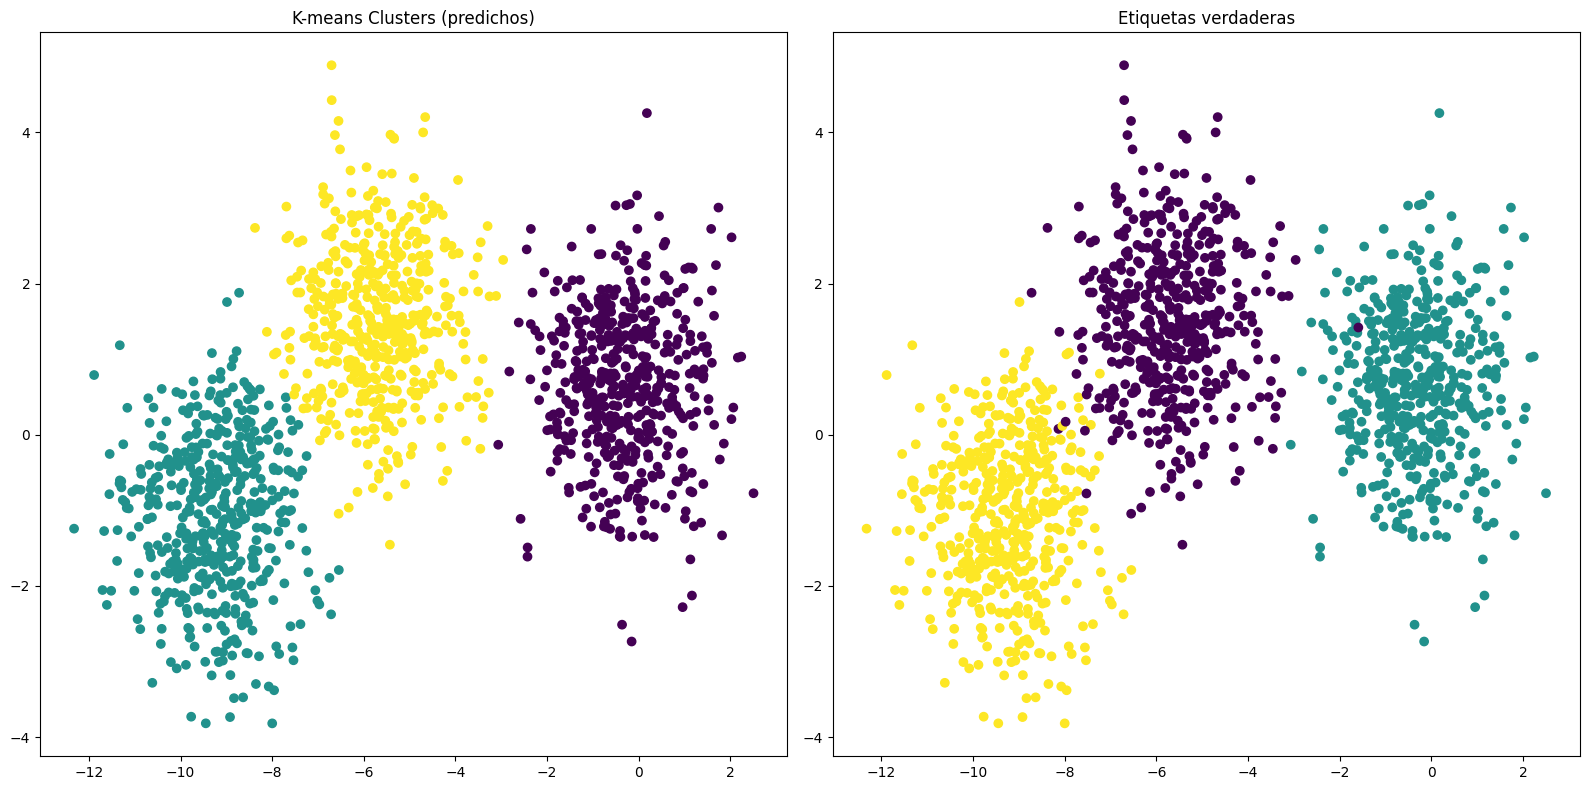

In [160]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

n_samples = 1500
X_kmeans, y_kmeans = make_blobs(n_samples=n_samples, centers = 3)

y_pred_kmeans = KMeans(n_clusters=3).fit_predict(X_kmeans)

fig, axs = plt.subplots(1, 2, figsize=(16, 8))

# Primer gráfico: clusters predichos por K-means
axs[0].scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=y_pred_kmeans, cmap='viridis')
axs[0].set_title("K-means Clusters (predichos)")

# Segundo gráfico: etiquetas reales
axs[1].scatter(X_kmeans[:, 0], X_kmeans[:, 1], c=y_kmeans, cmap='viridis')
axs[1].set_title("Etiquetas verdaderas")

plt.tight_layout()
plt.show()

### Aglomerativo

Clustering jerárquico aglomerativo es una técnica de aprendizaje no supervisado orientada a la agrupación de datos. Es un método jerárquico de tipo bottom-up: comienza considerando cada dato como un clúster separado y, de manera sucesiva, los va fusionando por pares en función de su similitud, hasta que todos quedan agrupados o se alcanza un número de clústeres deseado. 

A continuación se detalla el paso a paso del algoritmo:<br><br>
[1] Especificar el número de clusters $k$ que se van a encontrar en los datos.

[2] Inicializar el número de clusters al número de observaciones $N$.  

[3] Agrupar los dos clusters más cercanos según una medida de distancia entre clusters. 

[4] Recalcular el centroide de cada cluster a partir de las observaciones asignadas $\mu^1_1,\dots,\mu^1_{N-1}$.

[5] Repite los pasos 3-4 hasta que el número de clusters sea $k$.  

https://mlalgorithm.wordpress.com/wp-content/uploads/2016/06/agglomerative-clustering.gif

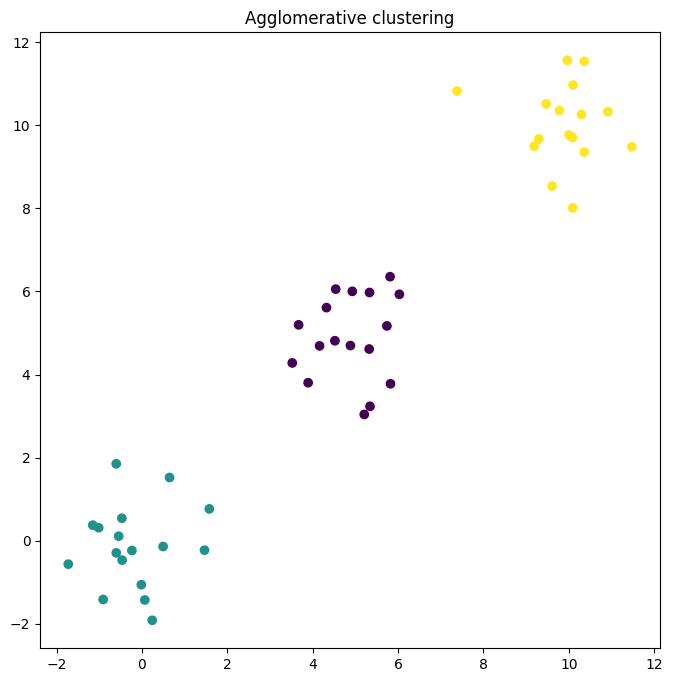

In [161]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

# Genera datos aleatoriamente en dos grupos localizados en posiciones diferentes:
n_samples_agglo = 50
centers = [(0, 0), (5, 5),(10,10)]
X_agglo, y_agglo = make_blobs(n_samples=n_samples_agglo, centers=centers, n_features=2,random_state=42)

clustering = AgglomerativeClustering(n_clusters=3).fit(X_agglo) 

plt.figure(figsize=(8, 8))
labels = clustering.fit_predict(X_agglo)
plt.scatter(X_agglo[:, 0], X_agglo[:, 1], c=labels)
plt.title("Agglomerative clustering")
plt.show()

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [45.0, 45.0, 55.0, 55.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [112.5, 112.5, 142.5, 142.5],
  [95.0, 95.0, 127.5, 127.5],
  [72.5, 72.5, 111.25, 111.25],
  [50.0, 50.0, 91.875, 91.875],
  [35.0, 35.0, 70.9375, 70.9375],
  [20.0, 20.0, 52.96875, 52.96875],
  [5.0, 5.0, 36.484375, 36.484375],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [195.0, 195.0, 205.0, 205.0],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [215.0, 215.0, 232.5, 232.5],
  [200.0, 200.0, 223.75, 223.75],
  [255.0, 255.0, 265.0, 265.0],
  [315.0, 315.0, 325.0, 325.0],
  [305.0, 305.0, 320.0, 320.0],
  [295.0, 295.0, 312.5, 312.5],
  [285.0, 285.0, 303.75, 303.75],
  [275.0, 275.0, 294.375, 294.375],
  [260.0, 260.0, 284.6875, 284.6875],
  [211.875, 211.875, 272.34375, 272.34375],
  [172.5, 17

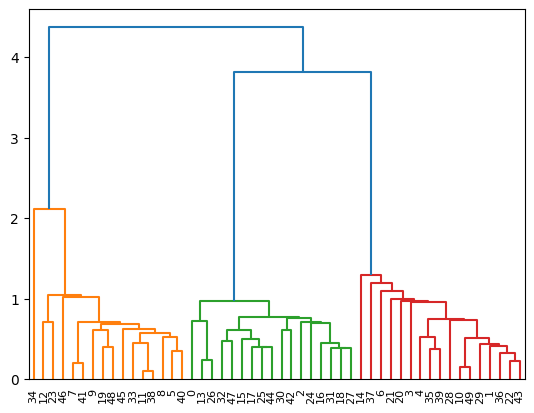

In [162]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z_agglo = linkage(X_agglo)
dendrogram(Z_agglo)

## REDUCCIÓN DE DIMENSIONALIDAD

### PCA

PCA (Análisis de Componentes Principales) es una técnica estadística clásica de reducción de dimensionalidad. Su objetivo es transformar un conjunto de variables posiblemente correlacionadas en un conjunto más pequeño de variables no correlacionadas llamadas componentes principales.

* Extrae las direcciones de mayor varianza en los datos y proyecta la información en un espacio de menor dimensión.

* Permite explorar y visualizar datos de alta dimensión, simplificándolos sin perder la mayor parte de la información.

* Es ampliamente usado para preprocesamiento de datos, compresión de información y visualización.

Dada $A$ matriz de datos de tamaño $m \times n$ (m observaciones × n variables), el algoritmo sigue los siguientes pasos:

[1] Centrar los datos: $(A - \bar{A})$.

[2] Obtener la matriz de covarianza de tamaño $n \times n$: $C = (A - \bar{A})^T (A - \bar{A})$.

[3] Diagonalizar $C$: $C \cdot \vec{v}_i = \lambda_i \vec{v}_i,\ i = 1,\dots,n$. Los vectores propios $\vec{v}_i$ corresponden a las coordenadas del espacio PCA. Los valores propios $\lambda_i$ representan la varianza de los datos originales explicada por cada componente.

La varianza explicada por la componente principal $\vec{v}_i$ es: $\frac{\lambda_i}{\sum_i^n \lambda_i}$

[4] Proyectar los datos en el nuevo espacio PCA. Proyección en la i-ésima componente: $P_i = A \cdot \vec{v}_i$

<div style="background-color:#fff3cd; padding:10px; border-left:4px solid #ffc107; margin:10px 0; color:#2c3e50;">
<strong>⚠️ Nota:</strong> PCA es una técnica lineal y sin supervisión. Es muy eficiente pero puede no capturar relaciones no lineales presentes en los datos.
</div>

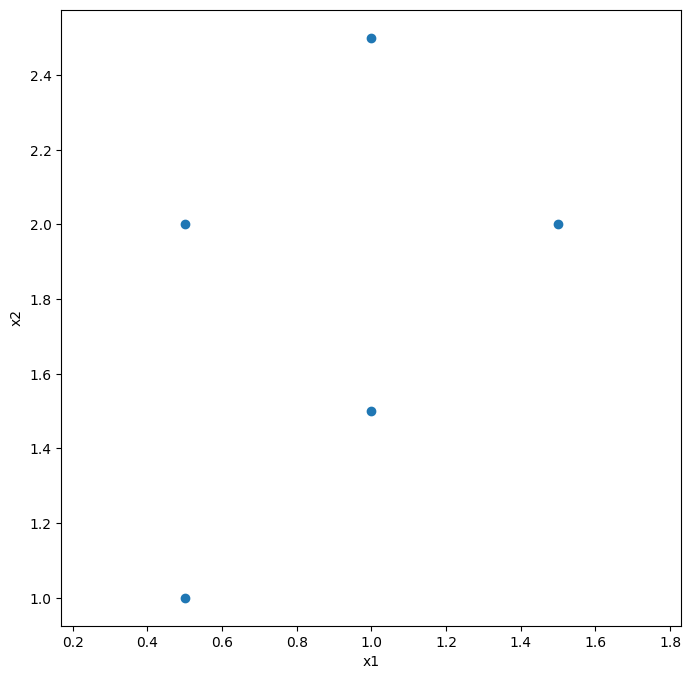

In [ ]:
import numpy as np
import matplotlib.pylab as plt
D_pca = np.array([[0.5,2],[1,1.5],[1.5,2],[1,2.5],[0.5,1]])

fig = plt.figure(figsize=(8,8))
plt.scatter(D_pca[:,0],D_pca[:,1])
plt.axis('equal')
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

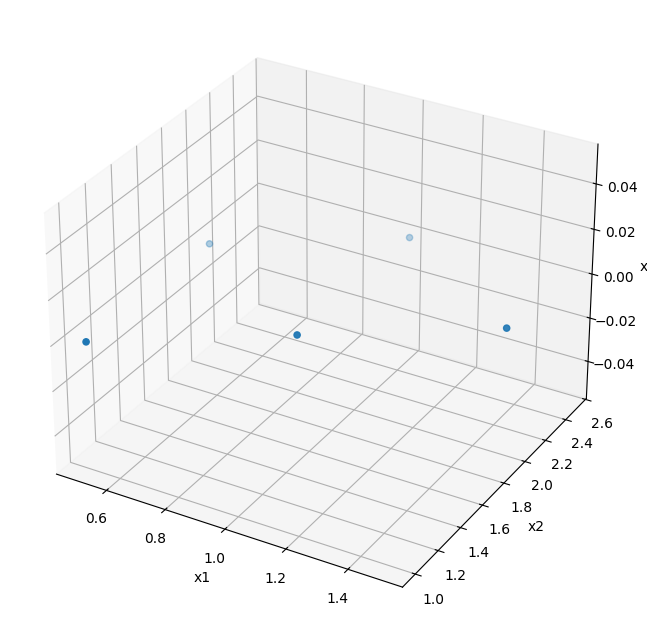

In [177]:
import numpy as np
import matplotlib.pyplot as plt

# Se añade una tercera dimensión a los datos originales
D_pca_3D = np.array([[0.5,2,0], [1,1.5,0], [1.5,2,0], [1,2.5,0], [0.5,1,0]])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')  # Crea ejes 3D

ax.scatter(D_pca_3D[:,0], D_pca_3D[:,1], D_pca_3D[:,2])  # Gráfica 3D

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
plt.show()

In [164]:
from sklearn.preprocessing import StandardScaler
DS_pca_3D = StandardScaler().fit_transform(D_pca_3D)

In [ ]:
from sklearn import decomposition
pca_3D = decomposition.PCA(n_components=3).fit(DS_pca_3D)
print(pca_3D.explained_variance_ratio_) # Descomposición de la explicación de la varianza en cada nuevo eje
print(100*pca_3D.explained_variance_ratio_.cumsum()) # Suma de %

[0.70965697 0.29034303 0.        ]
[ 70.96569673 100.         100.        ]


Por la manera en que hemos formado los datos (un plano en 3 dimensiones), era esperable que solo dos componentes sean capaces de explicar el 100% de la varianza

### T-SNE

t-SNE (t-distributed Stochastic Neighbor Embedding) es una técnica de reducción de dimensionalidad no lineal especialmente útil para la visualización de datos de alta dimensión en 2D o 3D preservando las relaciones locales entre los puntos.

* Ayuda a visualizar estructuras y agrupaciones en datos complejos.

* Utiliza distribuciones de probabilidad para medir la similitud entre puntos en el espacio original y proyectado.

* Es muy popular para la visualización de resultados en aprendizaje automático, especialmente sobre datos de imágenes, textos y genética.





<div style="background-color:#fff3cd; padding:10px; border-left:4px solid #ffc107; margin:10px 0; color:#2c3e50;">
<strong>⚠️ Nota:</strong> t-SNE es una técnica de visualización, no de clasificación.
</div>

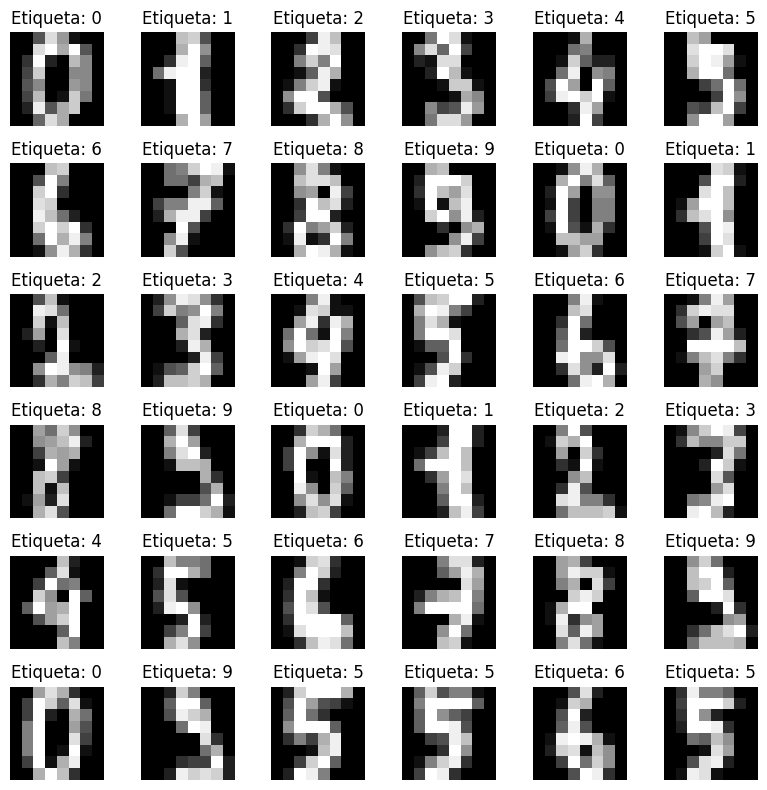

In [173]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Cargar dataset de dígitos
digits = load_digits()
X_tsne = digits.images       # Datos con 64 dimensiones (8x8 píxeles)
y_tsne = digits.target       # Etiquetas (dígitos del 0 al 9)

# Visualizar las primeras 16 imágenes con etiquetas
plt.figure(figsize=(8,8))
for i in range(36):
    plt.subplot(6, 6, i+1)
    plt.imshow(X_tsne[i], cmap='gray')
    plt.title(f"Etiqueta: {y_tsne[i]}")
    plt.axis('off')  # Ocultar ejes

plt.tight_layout()
plt.show()


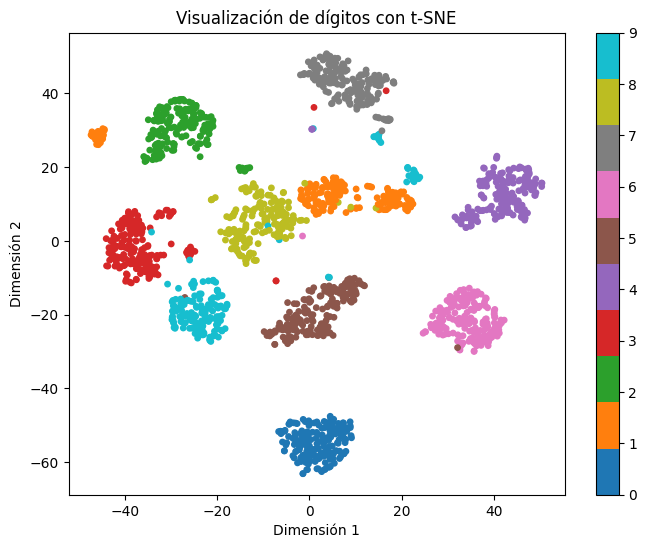

In [176]:
from sklearn.manifold import TSNE

# Aplanar cada imagen de 8x8 a un vector de 64 dimensiones
X_flat = X_tsne.reshape((X_tsne.shape[0], -1))

# Definir y ajustar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_embedded = tsne.fit_transform(X_flat)

# Visualizar resultados en 2D
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=y_tsne, cmap='tab10', s=15)
plt.colorbar(scatter, ticks=range(10))
plt.title('Visualización de dígitos con t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.show()